### SCIKIT-LEARN

#### K_neighbors

In [2]:
 import numpy as np
 from sklearn.neighbors import NearestNeighbors
 X = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]
 neigh = NearestNeighbors()
 neigh.fit(X)

NearestNeighbors()

In [3]:
 #kNN, K=2
 dist, index=neigh.kneighbors([[0, 0, 1.3]], n_neighbors=2, return_distance=True)
 print(dist)
 print(index)

[[0.3 0.7]]
[[2 0]]


In [4]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

#### Radius-Based

In [5]:
 import numpy as np
 from sklearn.neighbors import NearestNeighbors
 X = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]
 neigh = NearestNeighbors()
 neigh.fit(X)

NearestNeighbors()

In [7]:
# radius-based, radius = 0.4
dist, index=neigh.radius_neighbors([[0, 0, 1.3]], radius=0.4, return_distance=True)
print(dist)
print(index)

[array([0.3])]
[array([2], dtype=int64)]


### EX 1
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

Utilize the load_breast_cancer dataset from Scikit-learn to implement a K-Nearest
Neighbors (KNN) classifier. Split the dataset into training and testing sets (e.g., 80% training, 20% testing), and evaluate the performance of the model.

Hint:
- l Utilize sklearn.neighbors.KNeighborsClassifier to implement the KNN regressor.
- l Employ the train_test_split function to split the dataset.
- l Utilize the accuracy_score method of the classifier to evaluate the model's
 performance on the testing set.

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  
y = data.target 

# l Employ the train_test_split function to split the dataset.
# Split the dataset into training and testing sets (80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

#  l Utilize the accuracy_score method of the classifier to evaluate the model's performance on the testing set.
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9649122807017544


### EX 2.
 Fill up the codes in __?__ in the following second block. Then, we can find the most
 appropriate K-values by plotting the training/test accuracy for the various n_neighbours
 in a graph.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fruit = pd.read_csv('./data/Week7_HD_fruit_data.csv')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
 # The result might be different, if you change the random_state or test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('training set- accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('test set- accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

training set- accuracy: 0.95
test set- accuracy: 0.94


In [20]:
neighbours = np.arange(1,10) # Let's run K-values from 1-9
training_accuracy = np.zeros(len(neighbours))
testing_accuracy = np.zeros(len(neighbours))

In [23]:
neighbours

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
for i in range(len(neighbours)):
    knn = KNeighborsClassifier(n_neighbors = neighbours[i])
    knn.fit(X_train, y_train)
    training_accuracy[i] = knn.score(X_train, y_train)
    testing_accuracy[i] = knn.score(X_test, y_test)

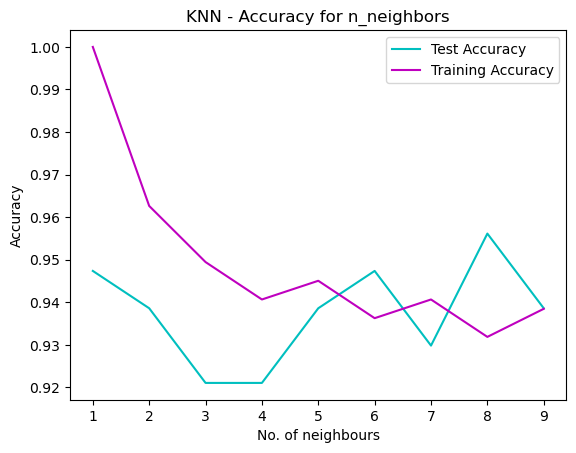

In [22]:
plt.title('KNN - Accuracy for n_neighbors')
plt.plot(neighbours, testing_accuracy, label='Test Accuracy', color='c')
plt.plot(neighbours, training_accuracy, label='Training Accuracy', color='m')
plt.legend()
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy')
plt.show()